In [29]:
%matplotlib inline

In [30]:
import matplotlib.pyplot as plt

In [31]:
import pandas as pd
import numpy as np

In [32]:
prof_data = pd.read_csv("factors_us_201106.csv")
prof_data = prof_data[prof_data.year >= 1970]
size_value_data = pd.read_csv("factor.csv")
size_mom_data = pd.read_csv("Mom.csv")

In [33]:
prof_data = pd.merge(prof_data,size_value_data[['year_x','month','SMB','HML']],
                      left_on=['year','month'], right_on = ['year_x','month'],
                      suffixes = ['_prof','_team'], how = 'left' )

In [34]:
prof_data = pd.merge(prof_data, size_mom_data[['year','month','MOM']],
                      left_on=['year','month'], right_on = ['year','month'],
                     suffixes = ['_prof','_team'], how = 'left')

In [35]:
prof_data['HML_team'] = prof_data['HML_team']/100

In [36]:
ff_data = pd.read_csv("ff.csv",index_col=0, parse_dates=True,nrows = 633)

In [37]:
ff_data['date'] = pd.to_datetime(ff_data.index, format="%Y%m", errors='coerce') 
ff_data['year'] = ff_data.date.dt.year
ff_data['month']= ff_data.date.dt.month

In [38]:
ff_data.rename(columns={'SMB':'SMB_FF','HML':'HML_FF'},inplace=True)

In [39]:
prof_data = pd.merge(prof_data, ff_data[['SMB_FF','HML_FF','year','month']], 
                    left_on = ['year','month'], right_on = ['year','month'], how = 'left')

In [40]:
prof_data.ix[:,'SMB_FF'] *= 0.01
prof_data.ix[:,'HML_FF'] *= 0.01

In [41]:
prof_data['date'] = pd.to_datetime(prof_data.year*10000+prof_data.month*100+28,format='%Y%m%d')
prof_data.set_index('date', inplace=True)

### Make Equity Curves

In [42]:
def make_plot(df, column1, column2,  plot_name,file_name,label1, label2):
    plt.plot((df[column1]+1).cumprod(), label = label1)
    plt.plot((df[column2]+1).cumprod(), label = label2)
    plt.xlabel("Year")
    plt.ylabel("Equity")
    plt.legend(loc='upper left')
    plt.title(plot_name)
    plt.savefig(file_name+".png")

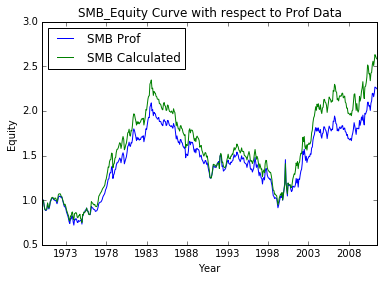

In [43]:
make_plot(prof_data,"SMB_prof", "SMB_team", 
          "SMB_Equity Curve with respect to Prof Data","SMB_Equity_Prof","SMB Prof", "SMB Calculated"  )

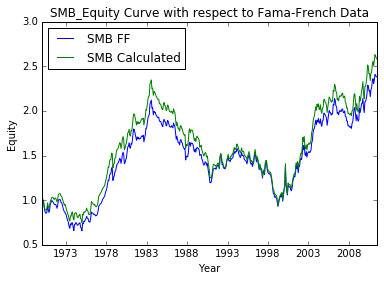

In [44]:
make_plot(prof_data,"SMB_FF", "SMB_team", "SMB_Equity Curve with respect to Fama-French Data","SMB_Equity_FF","SMB FF", "SMB Calculated"  )

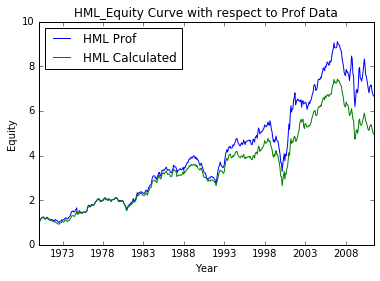

In [45]:
make_plot(prof_data,"HML_prof", "HML_team", "HML_Equity Curve with respect to Prof Data","HML_Equity_Prof","HML Prof", "HML Calculated"  )

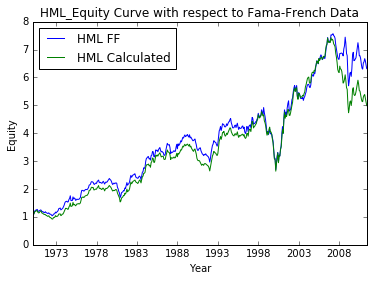

In [46]:
make_plot(prof_data,"HML_FF", "HML_team", "HML_Equity Curve with respect to Fama-French Data","HML_Equity_FF","HML FF", "HML Calculated"  )

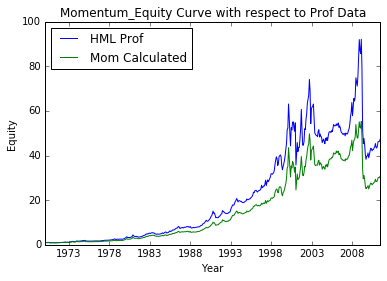

In [47]:
make_plot(prof_data,"Mom", "MOM", "Momentum_Equity Curve with respect to Prof Data","Mom_Equity_Prof","HML Prof", "Mom Calculated"  )

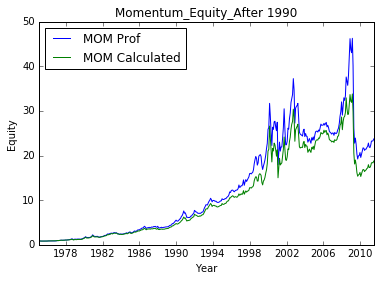

In [51]:
make_plot(prof_data[prof_data.year>=1990],"Mom", "MOM", "Momentum_Equity_After 1990","Mom_Equity_Prof_gt_1990", "MOM Prof", "MOM Calculated"  )

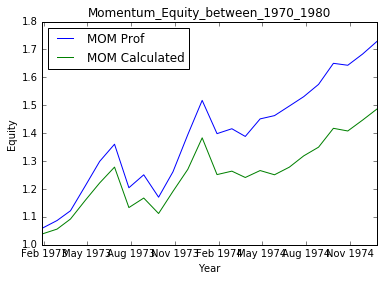

In [52]:
make_plot(prof_data[np.logical_and(prof_data.year<1975,prof_data.year>=1973)],
          "Mom", "MOM", "Momentum_Equity_between_1970_1980","Mom_Equity_Prof_70_80", "MOM Prof", "MOM Calculated"  )

In [53]:
prof_data.head()

,year,month,Mkt-RF,SMB_prof,HML_prof,Mom,RF,year_x,SMB_team,HML_team,MOM,SMB_FF,HML_FF
date,,,,,,,,,,,,,
1970-01-28,1970,1,-0.081977,0.018333,0.029744,0.016185,0.006558,1970,0.018006,0.025696,0.011880,0.0309,0.0307
1970-02-28,1970,2,0.052181,-0.014529,0.025170,0.012509,0.005942,1970,-0.017021,0.034900,-0.006081,-0.0257,0.0402
1970-03-28,1970,3,-0.009953,-0.013576,0.045717,0.005464,0.005525,1970,-0.009910,0.041381,-0.010996,-0.0243,0.0425
1970-04-28,1970,4,-0.109564,-0.056287,0.056026,0.017024,0.005425,1970,-0.055106,0.055357,0.010108,-0.0629,0.0640
1970-05-28,1970,5,-0.068553,-0.041602,0.042740,-0.016688,0.005700,1970,-0.040684,0.033025,-0.024404,-0.0441,0.0363


In [54]:
prof_data.to_csv("Factors_team")

In [55]:
FF_mom = pd.read_csv("FF_Momentum.csv",index_col=0)
FF_mom['date'] = pd.to_datetime(FF_mom.index, format="%Y%m", errors='coerce') 
FF_mom['year'] = FF_mom.date.dt.year
FF_mom['month']= FF_mom.date.dt.month
FF_mom['Mom'] *= 0.01

In [56]:
prof_data = pd.merge(prof_data,FF_mom[['year','month','Mom']], on = ['year','month'],suffixes = ['_prof','_FF'], how = 'left')

In [57]:
prof_data.head()

,year,month,Mkt-RF,SMB_prof,HML_prof,Mom_prof,RF,year_x,SMB_team,HML_team,MOM,SMB_FF,HML_FF,Mom_FF
0,1970,1,-0.081977,0.018333,0.029744,0.016185,0.006558,1970,0.018006,0.025696,0.011880,0.0309,0.0307,0.0063
1,1970,2,0.052181,-0.014529,0.025170,0.012509,0.005942,1970,-0.017021,0.034900,-0.006081,-0.0257,0.0402,0.0012
2,1970,3,-0.009953,-0.013576,0.045717,0.005464,0.005525,1970,-0.009910,0.041381,-0.010996,-0.0243,0.0425,-0.0029
3,1970,4,-0.109564,-0.056287,0.056026,0.017024,0.005425,1970,-0.055106,0.055357,0.010108,-0.0629,0.0640,-0.0073
4,1970,5,-0.068553,-0.041602,0.042740,-0.016688,0.005700,1970,-0.040684,0.033025,-0.024404,-0.0441,0.0363,-0.0269
